In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

import patsy

In [26]:
test_df = pd.read_csv('classification_challenge_submission.csv')
test_df.head()

Unnamed: 0  age type_employer     education  education_num  \
0       18099   45   Federal-gov  Some-college             10   
1       10672   17       Private          12th              8   
2       17947   24       Private     Bachelors             13   
3       13753   46       Private       HS-grad              9   
4        4279   59       Private     Bachelors             13   

              marital    occupation relationship   race   sex  capital_gain  \
0  Married-civ-spouse  Adm-clerical      Husband  Black  Male             0   
1       Never-married         Sales    Own-child  White  Male             0   
2       Never-married  Adm-clerical    Own-child  White  Male             0   
3  Married-civ-spouse  Craft-repair      Husband  Black  Male          4064   
4           Separated  Adm-clerical    Unmarried  White  Male             0   

   capital_loss  hr_per_week        country  
0             0           20  United-States  
1             0           40  United-States  
2             0           40  United-States  
3             0           40  United-States  
4             0           60  United-States

In [27]:
df = pd.read_csv('classification_challenge_training.csv') # read in the census-derived data; mind the separator
df.head()

Unnamed: 0  age type_employer  education  education_num  \
0           4   53       Private       11th              7   
1       14656   32       Private    HS-grad              9   
2       26677   29       Private       10th              6   
3        4281   30       Private  Assoc-voc             11   
4       15668   66       Private    HS-grad              9   

                 marital         occupation   relationship   race     sex  \
0     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
1     Married-civ-spouse       Adm-clerical           Wife  White  Female   
2  Married-spouse-absent       Adm-clerical      Unmarried  White  Female   
3     Married-civ-spouse  Handlers-cleaners        Husband  White    Male   
4                Widowed    Priv-house-serv  Not-in-family  White  Female   

   capital_gain  capital_loss  hr_per_week        country  income  
0             0             0           40  United-States       0  
1             0             0           40  United-States       1  
2             0             0           40         Mexico       0  
3             0             0           40         Mexico       0  
4             0             0            8  United-States       0

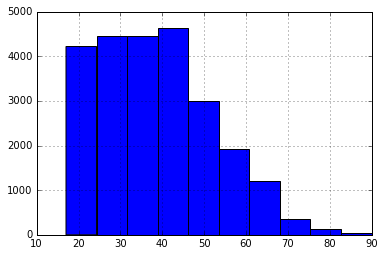

In [28]:
df.age.hist()

In [29]:
df.describe()

Unnamed: 0           age  education_num  capital_gain  capital_loss  \
count  24420.000000  24420.000000   24420.000000  24420.000000  24420.000000   
mean   16328.315807     38.546683      10.072686   1068.968428     86.702621   
std     9409.140597     13.640007       2.569242   7376.793336    402.449980   
min        1.000000     17.000000       1.000000      0.000000      0.000000   
25%     8181.500000     28.000000       9.000000      0.000000      0.000000   
50%    16373.500000     37.000000      10.000000      0.000000      0.000000   
75%    24494.250000     48.000000      12.000000      0.000000      0.000000   
max    32561.000000     90.000000      16.000000  99999.000000   4356.000000   

        hr_per_week        income  
count  24420.000000  24420.000000  
mean      40.490909      0.240008  
std       12.323059      0.427097  
min        1.000000      0.000000  
25%       40.000000      0.000000  
50%       40.000000      0.000000  
75%       45.000000      0.000000  
max       99.000000      1.000000

In [30]:
test_df['income'] = 2

In [31]:
combined = pd.concat([df,test_df])

In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 8140
Data columns (total 15 columns):
Unnamed: 0       32561 non-null int64
age              32561 non-null int64
type_employer    32561 non-null object
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [33]:
def get_features(dataframe):
    features = patsy.dmatrix('~ C(type_employer) + C(marital) +\
    C(occupation) + C(relationship) + C(race) + C(sex) + C(country)', dataframe)
    X_df = pd.DataFrame(features, columns=features.design_info.column_names)
    X_df.drop('Intercept', axis=1, inplace=True)
    #X_df = pd.concat([X_df, dataframe[['age', 'education_num', 'capital_gain', 'capital_loss', 'hr_per_week']]], axis=1)
    return X_df

In [34]:
df.shape

(24420, 15)

In [35]:
num_X = combined[['Unnamed: 0','income', 'age', 'education_num', 'capital_gain', 'capital_loss', 'hr_per_week']]

In [36]:
all_X = get_features(combined)

In [37]:
all_X.shape

(32561, 79)

In [38]:
all_X.reset_index(drop=True, inplace=True)

In [39]:
num_X.reset_index(drop=True, inplace=True)

In [40]:
full_df = pd.concat([num_X, all_X], axis=1)

In [121]:
submission_df = full_df.copy()
submission_df = submission_df[submission_df['income']==2]

In [122]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 24420 to 32560
Data columns (total 86 columns):
Unnamed: 0                                  8141 non-null int64
income                                      8141 non-null int64
age                                         8141 non-null int64
education_num                               8141 non-null int64
capital_gain                                8141 non-null int64
capital_loss                                8141 non-null int64
hr_per_week                                 8141 non-null int64
C(type_employer)[T.Federal-gov]             8141 non-null float64
C(type_employer)[T.Local-gov]               8141 non-null float64
C(type_employer)[T.Never-worked]            8141 non-null float64
C(type_employer)[T.Private]                 8141 non-null float64
C(type_employer)[T.Self-emp-inc]            8141 non-null float64
C(type_employer)[T.Self-emp-not-inc]        8141 non-null float64
C(type_employer)[T.State-gov]               

In [42]:
training_df = full_df.copy()
training_df = training_df[training_df['income']!=2]

In [43]:
training_df.head()

Unnamed: 0  income  age  education_num  capital_gain  capital_loss  \
0           4       0   53              7             0             0   
1       14656       1   32              9             0             0   
2       26677       0   29              6             0             0   
3        4281       0   30             11             0             0   
4       15668       0   66              9             0             0   

   hr_per_week  C(type_employer)[T.Federal-gov]  \
0           40                              0.0   
1           40                              0.0   
2           40                              0.0   
3           40                              0.0   
4            8                              0.0   

   C(type_employer)[T.Local-gov]  C(type_employer)[T.Never-worked]  \
0                            0.0                               0.0   
1                            0.0                               0.0   
2                            0.0                               0.0   
3                            0.0                               0.0   
4                            0.0                               0.0   

             ...             C(country)[T.Portugal]  \
0            ...                                0.0   
1            ...                                0.0   
2            ...                                0.0   
3            ...                                0.0   
4            ...                                0.0   

   C(country)[T.Puerto-Rico]  C(country)[T.Scotland]  C(country)[T.South]  \
0                        0.0                     0.0                  0.0   
1                        0.0                     0.0                  0.0   
2                        0.0                     0.0                  0.0   
3                        0.0                     0.0                  0.0   
4                        0.0                     0.0                  0.0   

   C(country)[T.Taiwan]  C(country)[T.Thailand]  \
0                   0.0                     0.0   
1                   0.0                     0.0   
2                   0.0                     0.0   
3                   0.0                     0.0   
4                   0.0                     0.0   

   C(country)[T.Trinadad&Tobago]  C(country)[T.United-States]  \
0                            0.0                          1.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          1.0   

   C(country)[T.Vietnam]  C(country)[T.Yugoslavia]  
0                    0.0                       0.0  
1                    0.0                       0.0  
2                    0.0                       0.0  
3                    0.0                       0.0  
4                    0.0                       0.0  

[5 rows x 86 columns]

In [57]:
X = training_df.iloc[:,2:]

In [58]:
X.head()

age  education_num  capital_gain  capital_loss  hr_per_week  \
0   53              7             0             0           40   
1   32              9             0             0           40   
2   29              6             0             0           40   
3   30             11             0             0           40   
4   66              9             0             0            8   

   C(type_employer)[T.Federal-gov]  C(type_employer)[T.Local-gov]  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   

   C(type_employer)[T.Never-worked]  C(type_employer)[T.Private]  \
0                               0.0                          1.0   
1                               0.0                          1.0   
2                               0.0                          1.0   
3                               0.0                          1.0   
4                               0.0                          1.0   

   C(type_employer)[T.Self-emp-inc]            ...             \
0                               0.0            ...              
1                               0.0            ...              
2                               0.0            ...              
3                               0.0            ...              
4                               0.0            ...              

   C(country)[T.Portugal]  C(country)[T.Puerto-Rico]  C(country)[T.Scotland]  \
0                     0.0                        0.0                     0.0   
1                     0.0                        0.0                     0.0   
2                     0.0                        0.0                     0.0   
3                     0.0                        0.0                     0.0   
4                     0.0                        0.0                     0.0   

   C(country)[T.South]  C(country)[T.Taiwan]  C(country)[T.Thailand]  \
0                  0.0                   0.0                     0.0   
1                  0.0                   0.0                     0.0   
2                  0.0                   0.0                     0.0   
3                  0.0                   0.0                     0.0   
4                  0.0                   0.0                     0.0   

   C(country)[T.Trinadad&Tobago]  C(country)[T.United-States]  \
0                            0.0                          1.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          1.0   

   C(country)[T.Vietnam]  C(country)[T.Yugoslavia]  
0                    0.0                       0.0  
1                    0.0                       0.0  
2                    0.0                       0.0  
3                    0.0                       0.0  
4                    0.0                       0.0  

[5 rows x 84 columns]

In [59]:
y = training_df['income']

In [60]:
"""Clean/munge your data."""

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=77) ## create train-test out of the data given

In [61]:
lr = LogisticRegressionCV(Cs=10, cv=5)
lr.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [62]:
""" Fit a binary classification predictor."""

y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test) # Submit these response, the output of model.decision_function

           predicted_over50k  predicted_under50k
over_50k                1142                 792
under_50k                417                5708
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6125
          1       0.73      0.59      0.65      1934

avg / total       0.84      0.85      0.84      8059



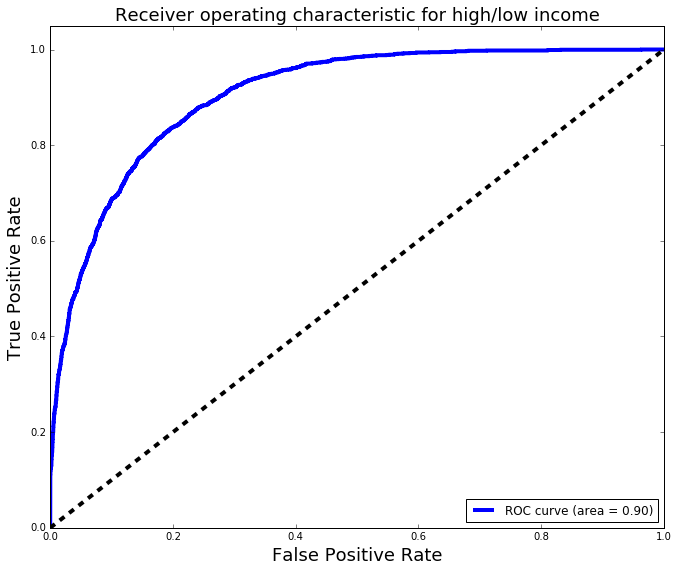

In [63]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(Y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(Y_test,y_pred)
roc_auc_score(Y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [64]:
coef = pd.DataFrame([X.columns.values.tolist(), lr.coef_[0].tolist()], index=['features', 'coef']).T

In [65]:
coef.sort_values(by='coef', ascending=False)

features         coef
14      C(marital)[T.Married-civ-spouse]     0.955691
22      C(occupation)[T.Exec-managerial]     0.849787
37               C(relationship)[T.Wife]     0.797883
31         C(occupation)[T.Tech-support]     0.625906
28       C(occupation)[T.Prof-specialty]     0.622206
42                        C(sex)[T.Male]     0.524019
5        C(type_employer)[T.Federal-gov]     0.484305
29      C(occupation)[T.Protective-serv]     0.467233
30                C(occupation)[T.Sales]     0.324219
1                          education_num     0.239393
9       C(type_employer)[T.Self-emp-inc]     0.189548
13       C(marital)[T.Married-AF-spouse]     0.131464
72             C(country)[T.Philippines]     0.112595
66                   C(country)[T.Japan]     0.106221
52                  C(country)[T.France]    0.0787259
21         C(occupation)[T.Craft-repair]    0.0655907
64                   C(country)[T.Italy]    0.0581446
47                    C(country)[T.Cuba]    0.0420554
4                            hr_per_week    0.0275744
0                                    age    0.0172743
44                  C(country)[T.Canada]    0.0110252
63                 C(country)[T.Ireland]    0.0103263
81           C(country)[T.United-States]   0.00311681
59                    C(country)[T.Hong]   0.00109527
3                           capital_loss  0.000626794
2                           capital_gain  0.000303738
83              C(country)[T.Yugoslavia]  -0.00206122
43                C(country)[T.Cambodia]   -0.0023185
57      C(country)[T.Holand-Netherlands]  -0.00240918
19         C(occupation)[T.Adm-clerical]  -0.00409249
..                                   ...          ...
50             C(country)[T.El-Salvador]     -0.10124
82                 C(country)[T.Vietnam]    -0.113873
45                   C(country)[T.China]    -0.120097
75             C(country)[T.Puerto-Rico]    -0.133443
48      C(country)[T.Dominican-Republic]    -0.137955
46                C(country)[T.Columbia]    -0.141195
6          C(type_employer)[T.Local-gov]    -0.156196
27      C(occupation)[T.Priv-house-serv]    -0.158643
61                   C(country)[T.India]     -0.16085
15   C(marital)[T.Married-spouse-absent]    -0.163332
77                   C(country)[T.South]     -0.17147
18                 C(marital)[T.Widowed]    -0.177989
17               C(marital)[T.Separated]    -0.246222
11         C(type_employer)[T.State-gov]    -0.247194
32     C(occupation)[T.Transport-moving]    -0.251299
40                      C(race)[T.Other]    -0.314136
25    C(occupation)[T.Machine-op-inspct]    -0.362566
68                  C(country)[T.Mexico]    -0.437266
41                      C(race)[T.White]    -0.444976
10  C(type_employer)[T.Self-emp-not-inc]    -0.507435
38         C(race)[T.Asian-Pac-Islander]    -0.512405
39                      C(race)[T.Black]    -0.583357
33      C(relationship)[T.Not-in-family]    -0.626176
34     C(relationship)[T.Other-relative]    -0.700606
24    C(occupation)[T.Handlers-cleaners]    -0.718849
16           C(marital)[T.Never-married]    -0.804208
23      C(occupation)[T.Farming-fishing]    -0.814426
26        C(occupation)[T.Other-service]    -0.928543
36          C(relationship)[T.Unmarried]    -0.944932
35          C(relationship)[T.Own-child]     -1.45178

[84 rows x 2 columns]

In [66]:
X_sub = submission_df.iloc[:,2:]
y_sub = lr.decision_function(X_sub)

In [67]:
y_sub

array([-0.97296719, -4.65049108, -3.66091827, ...,  0.98944014,
        0.59502162,  1.56673007])

In [68]:
from sklearn.grid_search import GridSearchCV
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']


gs = GridSearchCV(LogisticRegression(solver='liblinear'),
                 {'C': C_vals,
                 'penalty': penalties},
                 cv=10)
gs.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [69]:
gs.best_estimator_

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
gs.best_score_

0.8536153046879775

In [71]:
""" Fit a binary classification predictor."""

y_pred2 = gs.predict(X_test)
y_score2 = gs.decision_function(X_test) # Submit these response, the output of model.decision_function

           predicted_over50k  predicted_under50k
over_50k                1152                 782
under_50k                417                5708
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6125
          1       0.73      0.60      0.66      1934

avg / total       0.84      0.85      0.85      8059



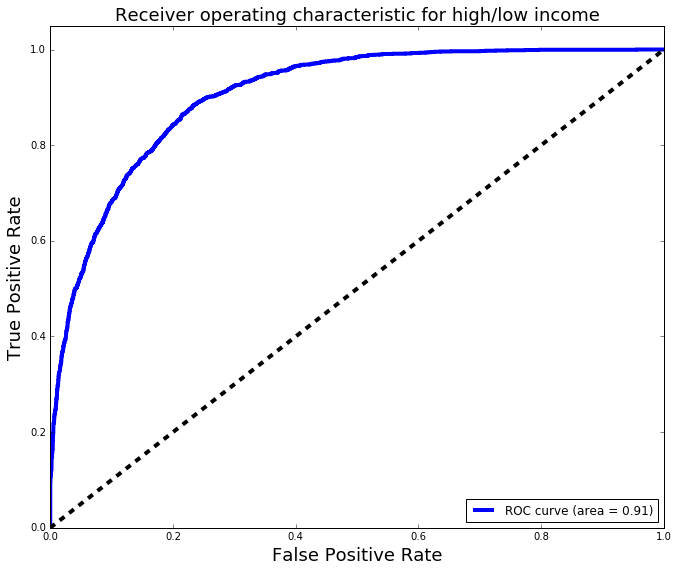

In [72]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(Y_test, y_pred2, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(Y_test,y_pred2)
roc_auc_score(Y_test, y_score2)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, y_score2)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [73]:
coef = pd.DataFrame([X.columns.values.tolist(), gs.best_estimator_.coef_[0].tolist()], index=['features', 'coef']).T

In [74]:
coef.sort_values(by='coef', ascending=False)

features         coef
14      C(marital)[T.Married-civ-spouse]      1.53194
37               C(relationship)[T.Wife]      1.32278
22      C(occupation)[T.Exec-managerial]      1.07705
31         C(occupation)[T.Tech-support]     0.980408
42                        C(sex)[T.Male]     0.847581
28       C(occupation)[T.Prof-specialty]     0.805244
29      C(occupation)[T.Protective-serv]     0.802214
5        C(type_employer)[T.Federal-gov]     0.737526
30                C(occupation)[T.Sales]     0.568866
72             C(country)[T.Philippines]     0.395285
21         C(occupation)[T.Craft-repair]       0.3812
9       C(type_employer)[T.Self-emp-inc]     0.368535
1                          education_num     0.281576
19         C(occupation)[T.Adm-clerical]     0.242774
8            C(type_employer)[T.Private]     0.187395
81           C(country)[T.United-States]     0.159293
44                  C(country)[T.Canada]    0.0705868
41                      C(race)[T.White]      0.03386
4                            hr_per_week    0.0332765
0                                    age     0.024898
3                           capital_loss  0.000644497
2                           capital_gain  0.000293059
20         C(occupation)[T.Armed-Forces]            0
65                 C(country)[T.Jamaica]            0
53                 C(country)[T.Germany]            0
54                  C(country)[T.Greece]            0
55               C(country)[T.Guatemala]            0
56                   C(country)[T.Haiti]            0
57      C(country)[T.Holand-Netherlands]            0
58                C(country)[T.Honduras]            0
..                                   ...          ...
17               C(marital)[T.Separated]            0
25    C(occupation)[T.Machine-op-inspct]            0
27      C(occupation)[T.Priv-house-serv]            0
15   C(marital)[T.Married-spouse-absent]            0
13       C(marital)[T.Married-AF-spouse]            0
12       C(type_employer)[T.Without-pay]            0
32     C(occupation)[T.Transport-moving]            0
49                 C(country)[T.Ecuador]            0
11         C(type_employer)[T.State-gov]            0
83              C(country)[T.Yugoslavia]            0
39                      C(race)[T.Black]            0
7       C(type_employer)[T.Never-worked]            0
48      C(country)[T.Dominican-Republic]            0
47                    C(country)[T.Cuba]            0
46                C(country)[T.Columbia]            0
6          C(type_employer)[T.Local-gov]            0
43                C(country)[T.Cambodia]            0
45                   C(country)[T.China]            0
75             C(country)[T.Puerto-Rico]   -0.0350893
33      C(relationship)[T.Not-in-family]   -0.0897498
68                  C(country)[T.Mexico]    -0.151699
24    C(occupation)[T.Handlers-cleaners]    -0.188572
40                      C(race)[T.Other]    -0.228086
36          C(relationship)[T.Unmarried]     -0.23358
10  C(type_employer)[T.Self-emp-not-inc]    -0.367315
26        C(occupation)[T.Other-service]    -0.390035
16           C(marital)[T.Never-married]    -0.558764
34     C(relationship)[T.Other-relative]    -0.588065
23      C(occupation)[T.Farming-fishing]    -0.819395
35          C(relationship)[T.Own-child]     -1.04563

[84 rows x 2 columns]

In [113]:
submission_df.drop('income', axis=1, inplace=True)

In [114]:
submission_df.head()

Unnamed: 0  age  education_num  capital_gain  capital_loss  \
24420       18099   45             10             0             0   
24421       10672   17              8             0             0   
24422       17947   24             13             0             0   
24423       13753   46              9          4064             0   
24424        4279   59             13             0             0   

       hr_per_week  C(type_employer)[T.Federal-gov]  \
24420           20                              1.0   
24421           40                              0.0   
24422           40                              0.0   
24423           40                              0.0   
24424           60                              0.0   

       C(type_employer)[T.Local-gov]  C(type_employer)[T.Never-worked]  \
24420                            0.0                               0.0   
24421                            0.0                               0.0   
24422                            0.0                               0.0   
24423                            0.0                               0.0   
24424                            0.0                               0.0   

       C(type_employer)[T.Private]            ...             \
24420                          0.0            ...              
24421                          1.0            ...              
24422                          1.0            ...              
24423                          1.0            ...              
24424                          1.0            ...              

       C(country)[T.Portugal]  C(country)[T.Puerto-Rico]  \
24420                     0.0                        0.0   
24421                     0.0                        0.0   
24422                     0.0                        0.0   
24423                     0.0                        0.0   
24424                     0.0                        0.0   

       C(country)[T.Scotland]  C(country)[T.South]  C(country)[T.Taiwan]  \
24420                     0.0                  0.0                   0.0   
24421                     0.0                  0.0                   0.0   
24422                     0.0                  0.0                   0.0   
24423                     0.0                  0.0                   0.0   
24424                     0.0                  0.0                   0.0   

       C(country)[T.Thailand]  C(country)[T.Trinadad&Tobago]  \
24420                     0.0                            0.0   
24421                     0.0                            0.0   
24422                     0.0                            0.0   
24423                     0.0                            0.0   
24424                     0.0                            0.0   

       C(country)[T.United-States]  C(country)[T.Vietnam]  \
24420                          1.0                    0.0   
24421                          1.0                    0.0   
24422                          1.0                    0.0   
24423                          1.0                    0.0   
24424                          1.0                    0.0   

       C(country)[T.Yugoslavia]  
24420                       0.0  
24421                       0.0  
24422                       0.0  
24423                       0.0  
24424                       0.0  

[5 rows x 85 columns]

In [115]:
#submission_df['income'] = gs.predict(X_sub)
submission_df['score'] = gs.decision_function(X_sub)

In [118]:
submission_df = submission_df.iloc[:,1:]
submission_df.head()

age  education_num  capital_gain  capital_loss  hr_per_week  \
24420   45             10             0             0           20   
24421   17              8             0             0           40   
24422   24             13             0             0           40   
24423   46              9          4064             0           40   
24424   59             13             0             0           60   

       C(type_employer)[T.Federal-gov]  C(type_employer)[T.Local-gov]  \
24420                              1.0                            0.0   
24421                              0.0                            0.0   
24422                              0.0                            0.0   
24423                              0.0                            0.0   
24424                              0.0                            0.0   

       C(type_employer)[T.Never-worked]  C(type_employer)[T.Private]  \
24420                               0.0                          0.0   
24421                               0.0                          1.0   
24422                               0.0                          1.0   
24423                               0.0                          1.0   
24424                               0.0                          1.0   

       C(type_employer)[T.Self-emp-inc]    ...     C(country)[T.Puerto-Rico]  \
24420                               0.0    ...                           0.0   
24421                               0.0    ...                           0.0   
24422                               0.0    ...                           0.0   
24423                               0.0    ...                           0.0   
24424                               0.0    ...                           0.0   

       C(country)[T.Scotland]  C(country)[T.South]  C(country)[T.Taiwan]  \
24420                     0.0                  0.0                   0.0   
24421                     0.0                  0.0                   0.0   
24422                     0.0                  0.0                   0.0   
24423                     0.0                  0.0                   0.0   
24424                     0.0                  0.0                   0.0   

       C(country)[T.Thailand]  C(country)[T.Trinadad&Tobago]  \
24420                     0.0                            0.0   
24421                     0.0                            0.0   
24422                     0.0                            0.0   
24423                     0.0                            0.0   
24424                     0.0                            0.0   

       C(country)[T.United-States]  C(country)[T.Vietnam]  \
24420                          1.0                    0.0   
24421                          1.0                    0.0   
24422                          1.0                    0.0   
24423                          1.0                    0.0   
24424                          1.0                    0.0   

       C(country)[T.Yugoslavia]     score  
24420                       0.0 -0.987497  
24421                       0.0 -4.908774  
24422                       0.0 -3.652702  
24423                       0.0  0.200643  
24424                       0.0 -0.744930  

[5 rows x 85 columns]

In [119]:
submission_df.to_csv('classification_submission_amer_peter_jesse_jocelyn.csv')

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
gs2 = GridSearchCV(RandomForestClassifier(min_samples_leaf=10),
                  {'n_estimators': np.arange(10,50,10),
                  'max_features': np.arange(1,5,1)},
                  cv=10)
gs2.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 20, 30, 40]), 'max_features': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [87]:
gs2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [93]:
y_pred2 = gs2.predict_proba(X_test)

In [94]:
y_pred2

array([[ 0.71631956,  0.28368044],
       [ 0.84346156,  0.15653844],
       [ 0.92948532,  0.07051468],
       ..., 
       [ 0.90279815,  0.09720185],
       [ 0.87161806,  0.12838194],
       [ 0.68740287,  0.31259713]])

In [97]:
rfy = pd.DataFrame(y_pred2)

In [100]:
rfy['actual'] = np.array(Y_test)

In [101]:
rfy.head()

0         1  actual
0  0.716320  0.283680       0
1  0.843462  0.156538       0
2  0.929485  0.070515       0
3  0.940889  0.059111       0
4  0.951407  0.048593       0

In [103]:
rfy['threshold-50'] = rfy[1].map(lambda x: 0 if x < 0.5 else 1)

In [105]:
rfy.head(20)

0         1  actual  threshold-50
0   0.716320  0.283680       0             0
1   0.843462  0.156538       0             0
2   0.929485  0.070515       0             0
3   0.940889  0.059111       0             0
4   0.951407  0.048593       0             0
5   0.715581  0.284419       0             0
6   0.387306  0.612694       1             1
7   0.494727  0.505273       1             1
8   0.864731  0.135269       0             0
9   0.865924  0.134076       0             0
10  0.517375  0.482625       1             0
11  0.255583  0.744417       1             1
12  0.674645  0.325355       0             0
13  0.659051  0.340949       0             0
14  0.738960  0.261040       0             0
15  0.622543  0.377457       0             0
16  0.579492  0.420508       0             0
17  0.797413  0.202587       0             0
18  0.821167  0.178833       0             0
19  0.726595  0.273405       0             0

In [106]:
roc_auc_score(Y_test, rfy[1])

0.9064791591921153

           predicted_over50k  predicted_under50k
over_50k                 721                1213
under_50k                105                6020
             precision    recall  f1-score   support

          0       0.83      0.98      0.90      6125
          1       0.87      0.37      0.52      1934

avg / total       0.84      0.84      0.81      8059



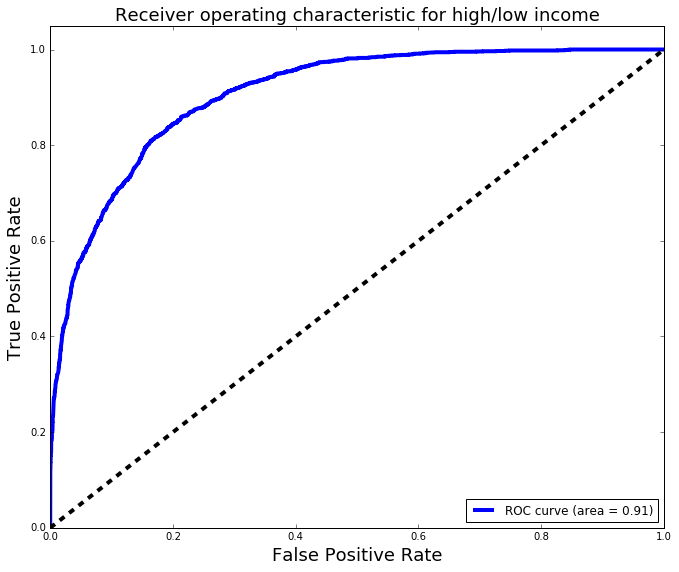

In [107]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(Y_test, rfy['threshold-50'], labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(Y_test,rfy['threshold-50'])
roc_auc_score(Y_test, rfy[1])

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, rfy[1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()